# Setting up Variables and Functions

In [1]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

A_VALUE = 50 # remains the same
B_VALUE = 100 
C_VALUE = 300

A_VALUE_S = 50 # remains the same
B_VALUE_S = 0 
C_VALUE_S = 3000


BETA1 = 1
BETA2 = 0.01
BETA3 = 15
BETA_S1 = 0.001
BETA_S2 = 100

### Calculating X and Reputation Score for Buyers/Sellers

In [2]:
'''
Account Age Increment: in Months 
Time_btwn_transactions: in hours
price: in ETH (range: 0.001 to 1)
'''

def calculateX_Buyer(old_x, time_btwn_transactions, price):
    global BETA1, BETA2, BETA3, BETA4
    beta1 = BETA1
    beta2 = BETA2
    beta3 = BETA3
    temp1 = (100*time_btwn_transactions)/math.sqrt(1000+time_btwn_transactions**2)
    if price>=2**112:
        price = 2**111
    temp2 = np.log(1+price/10**beta3) #price is in wei  

    if time_btwn_transactions >= 16*24:
        timePassed = 16 #in days 
    else:
        timePassed = math.floor(time_btwn_transactions/24)
    return old_x*beta1*(0.99**(timePassed)) + beta2*temp1*temp2

def calculateX_Seller(oldX, rep_score, rincoming, raverage):
    global BETA_S1, BETA_S2
    if (rincoming-raverage)==0:
        return oldX
    
    return oldX + (1/((rincoming-raverage)+1))*rep_score*BETA_S1


# calculating reputation score 

def calculateRep_Buyer(x):
    global A_VALUE, B_VALUE, C_VALUE
    a = A_VALUE
    b = B_VALUE
    c = C_VALUE
    temp1 = x-b
    temp2 = c + (x-b)*(x-b)
    temp3 = temp1/math.sqrt(temp2)
    temp4 = temp3 +1
    return a * temp4


def calculateRep_Seller(x):
    global A_VALUE_S, B_VALUE_S, C_VALUE_S
    a = A_VALUE_S
    b = B_VALUE_S
    c = C_VALUE_S
    temp1 = x-b
    temp2 = c + (x-b)*(x-b)
    temp3 = temp1/math.sqrt(temp2)
    temp4 = temp3 +1
    return a * temp4
    

# Simulation 1: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Parameters are randomly chosen. They are not tuned
2. Three price values were explored to tune the equations

Number of transactions needed:  571
Number of hours:  571.0
Number of days:  23.791666666666668


Text(0, 0.5, 'Reputation score')

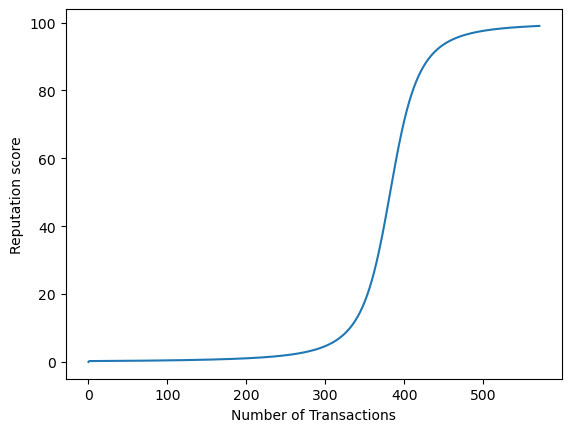

In [3]:
#declaring first time user parameters
user_age = 0
user_total_price_reviews = 0
total_reviews = 0
user_x = 0
user_rep = 0
# price=2322070000000000.0 #5USD
# price = 443866700000000000.0 #1000USD
price = 1000000000000000000.0 #2k USD
total_time_passed = 0.0


repList = []
xList = []
repList.append(0)
xList.append(0)

A_VALUE = 50 # remains the same
B_VALUE = 100
C_VALUE = 100
BETA1 = 1
BETA2 = 0.05
BETA3 = 0.02
BETA4 = 0.04

while user_rep < 99:
        total_time_passed += 1.0    
        user_x = calculateX_Buyer(user_x, 1, price)
        xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
        repList.append(user_rep)

        
print("Number of transactions needed: ", len(repList)-1)
print("Number of hours: ",(total_time_passed))
print("Number of days: ", (total_time_passed)/24)


x = [i for i in range(len(repList))]
y = repList
plt.plot(x,y)
plt.xlabel("Number of Transactions")
plt.ylabel("Reputation score")


# Simulation 2: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Here, the attacker spams review every hour. 
2. Different values of the hyperparameters are explored to choose the ones best to resist such attacks. 


**Hyperparameters**
1. B_VALUE
2. C_VALUE
3. BETA1
4. BETA2
5. BETA3
6. BETA4

In [4]:
df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'hours', 'days'])
b1 = 1 #beta1 is always 1

def sim2(b, c,b1, b2, b3, b4):
    #hyperparameters
    global B_VALUE, C_VALUE, BETA2, BETA3, BETA4
    B_VALUE = b
    C_VALUE = c
    BETA2 = b2
    BETA3 = b3
    BETA4 = b4
    
    #Variables to keep track of
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    price =2322070000000000
    while user_rep < 99:
        total_time_passed += 1.0
        user_x = calculateX_Buyer(user_x, 1, price)
        xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
        repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24

#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(100, 400, 100):
    for c in range(100, 400, 100):
        for b2 in [0.01, 0.05, 0.1]:
            for b3 in range(10, 15): 
                    transactions, ETH, hours, days = sim2(b, c, b1, b2, b3, b4)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, hours, days]
    
df

,B_VALUE,C_VALUE,BETA1,BETA2,BETA3,BETA4,transactions,ETH,hours,days
0,100.0,100.0,1.0,0.01,10.0,0.01,38218.0,88.744871,38218.0,1592.416667
1,100.0,100.0,1.0,0.01,10.0,0.05,7644.0,17.749903,7644.0,318.500000
2,100.0,100.0,1.0,0.01,10.0,0.10,3822.0,8.874952,3822.0,159.250000
3,100.0,100.0,1.0,0.01,11.0,0.01,46972.0,109.072272,46972.0,1957.166667
4,100.0,100.0,1.0,0.01,11.0,0.05,9395.0,21.815848,9395.0,391.458333
...,...,...,...,...,...,...,...,...,...,...
400,300.0,300.0,1.0,0.10,13.0,0.05,4472.0,10.384297,4472.0,186.333333
401,300.0,300.0,1.0,0.10,13.0,0.10,2236.0,5.192149,2236.0,93.166667
402,300.0,300.0,1.0,0.10,14.0,0.01,38248.0,88.814533,38248.0,1593.666667
403,300.0,300.0,1.0,0.10,14.0,0.05,7650.0,17.763835,7650.0,318.750000


In [5]:
df.to_csv('Simulation_2_1Hour_with_decay.csv')

# Simulation 3: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Here, the attacker spams review every 24 hours. 
2. Different values of the hyperparameters are explored to choose the ones best to resist such attacks. 


**Hyperparameters**
1. B_VALUE
2. C_VALUE
3. BETA1
4. BETA2
5. BETA3
6. BETA4

In [ ]:
df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'hours', 'days'])
b1 = 1 #beta1 is always 1

def sim3(b, c,b1, b2, b3, b4):
    #hyperparameters
    global B_VALUE, C_VALUE, BETA2, BETA3
    B_VALUE = b
    C_VALUE = c
    BETA2 = b2
    BETA3 = b3
    
    #Variables to keep track of
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    price =2322070000000000
    while user_rep < 99:
        total_time_passed += 24.0
        user_x = calculateX_Buyer(user_x, 24, price)
#         xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
#         repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24

#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(100, 400, 100):
    for c in range(100, 400, 100):
        for b2 in [0.01, 0.05, 0.1]:
            for b3 in range(10, 15): 
                    transactions, ETH, hours, days = sim3(b, c, b1, b2, b3, b4)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, hours, days]
    
df

In [ ]:
df.to_csv("Simulation_3_24Hour_with_decay.csv")

# Simulation 4: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Here, the attacker spams review at random time intervals
2. Different values of the hyperparameters are explored to choose the ones best to resist such attacks. 


**Hyperparameters**
1. B_VALUE
2. C_VALUE
3. BETA1
4. BETA2
5. BETA3
6. BETA4

In [ ]:
df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'hours', 'days'])
b1 = 1 #beta1 is always 1

def sim4(b, c,b1, b2, b3, b4):
    #hyperparameters
    global B_VALUE, C_VALUE, BETA2, BETA3, BETA4
    B_VALUE = b
    C_VALUE = c
    BETA2 = b2
    BETA3 = b3
    BETA4 = b4
    
    #Variables to keep track of
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    price =2322070000000000
    while user_rep < 99:
        arbitrary = np.random.randint(0, 168)
        total_time_passed += arbitrary
        user_x = calculateX_Buyer(user_x, arbitrary, price)
#         xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
#         repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24

#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(100, 400, 100):
    for c in range(100, 400, 100):
        for b2 in [0.01, 0.05, 0.1]:
            for b3 in range(10, 15): 
                    transactions, ETH, hours, days = sim4(b, c, b1, b2, b3, b4)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, hours, days]
    
df

In [ ]:
df.to_csv("Simulation_4_Arbitrary_Time_with_decay.csv")

# Simulation 5: Can a user create multiple different accounts, to influence reviews? (spam attack with un trusted users)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase? Each account creates one transaction/review --> number of accounts == number of transactions


**Others**
1. Values `B_VALUE_S`, `C_VALUE_S`, `BETA_S1`, `BETA_S2` are chosen arbitrarily


In [ ]:
# For the buyers we set 
A_VALUE = 50 # remains the same
B_VALUE = 100
C_VALUE = 100

A_VALUE_S = 50 # remains the same
B_VALUE_S = 500 #can be fine tuned
C_VALUE_S = 1000 #can be fine tuned


BETA1 = 1
BETA2 = 0.01
BETA3 = 17
BETA4 = 0.01
BETA_S = 0.1 #the smaller, means the lower the tolerance for deviation

In [ ]:
AVG_REVIEW = 0 #start 
OLD_X = 0 #start
R_INCOMING = 100
REP_SCORE = 0
review_list = []
count = 0

while count<10000 and AVG_REVIEW<99:
    count += 1
    X = calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW)
    AVG_REVIEW = calculateRep_Seller(X)
    OLD_X = X
    review_list.append(AVG_REVIEW)
    
x = [i for i in range(len(review_list))]
y = review_list
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Review Rating")
print("Total Transactions need to reach review score 99: ", len(review_list))
print("Minimum Expenditure (ETH): ", (len(review_list))*2322070000000000/(10**18))

# Simulation 6: Can a user create multiple different accounts, to influence reviews? (spam attack with fully trusted users)

**Considerations**
1. How tolerant is the system?
2. How many transactions are needed before you can significantly increase?
3. What parameters can we set?

**Notes**
1. Hyperparameters are chosen arbitrarily, simply to see

In [ ]:
A_VALUE_S = 50 # remains the same
B_VALUE_S = 200 
C_VALUE_S = 200
BETA_S1 = 0.01
BETA_S2 = 100
AVG_REVIEW = 0 #start 
OLD_X = 0 #start
R_INCOMING = 100
REP_SCORE = 99
review_list = []
count = 0

while count<1000000000 and AVG_REVIEW<50:
    count += 1
    X = calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW)
    AVG_REVIEW = calculateRep_Seller(X)
    OLD_X = X
    review_list.append(AVG_REVIEW)
    
x = [i for i in range(len(review_list))]
y = review_list
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Review Rating")
print("Total Transactions need to reach review score 99: ", len(review_list))
print("Minimum Expenditure (ETH): ", (len(review_list))*2322070000000000/(10**18))
print("Last review score: ", review_list[-1:])

# Simulation 7: Can a user create multiple different accounts, to influence reviews? (spam attack with fully trusted users)

**Considerations**
1. How tolerant is the system?
2. How many transactions are needed before you can significantly increase?
3. What parameters can we set?

**Notes**
1. Various values of hyperparameters are tested to see which will be most resistant

In [ ]:
df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA_S1', 'BETA_S2', 'transactions','ETH'])

def sim3(S1,S2 ,b, c):
    #hyperparameters
    global B_VALUE_S, C_VALUE_S, BETA_S1, BETA_S2
    B_VALUE_S = b
    C_VALUE_S = c
    BETA_S1 = S1
    BETA_S2 = S2
    #Variables to keep track of
    AVG_REVIEW = 0 #start 
    OLD_X = 0 #start
    R_INCOMING = 100
    REP_SCORE = 99
    review_list = []
    count = 0

    while count<5000000000 and AVG_REVIEW<99:
        count += 1
        X = calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW)
        AVG_REVIEW = calculateRep_Seller(X)
        OLD_X = X
        review_list.append(AVG_REVIEW)
    
    return len(review_list)


#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(100, 500, 100):
    for c in range(100, 500, 100):
        for S1 in [0.01, 0.1]:
            for S2 in range(100, 300, 100):
                transactions = sim3(S1, S2, b, c)
                df.loc[len(df)] = [b, c, S1, S2, transactions, transactions*2322070000000000/(10**18)]
    
df

In [ ]:
df.to_csv("Simulation_3_HyperParameterTuning_with_decay.csv")

# Simulation 8(NA): Can a user create multiple different accounts, to influence reviews? (spam attack with mixed time gaps with low reputation score)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

This simulation was taken from the senior's report. However, this is not possible in this version. First of all, using the same account, is the same as using multiple different accounts. This is because the reputation score is not negatively affected. 

# Simulation 9(NA): Can a user create multiple different accounts, to influence reviews? (spam attack with only long time durations between the attacks)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

This simulation was taken from the senior's report. However, this is not possible in this version. First of all, using the same account, is the same as using multiple different accounts. This is because the reputation score is not negatively affected. 

# Simulation 8: Can we use the same account, starting with no reputation, to gain reputation and leave a review?

**Considerations**
1. How tolerant is the system?
2. How many transactions is needed?

We know that we cannot deviate too far from the rating to affect the product rating. We also know we cannot have too much time in between the transaction. Additionally, we need to reduce the cost as much as possible for the attack. 

Let us say for each review left by the user, they receive a reward. Let us say they receive 10% of the product price multiplied by their reputation score. 

In [ ]:
A_VALUE = 50 # remains the same
B_VALUE = 100 
C_VALUE = 100

A_VALUE_S = 50 # remains the same
B_VALUE_S = 300
C_VALUE_S = 300


BETA1 = 1
BETA2 = 0.01
BETA3 = 17
BETA4 = 0.01
BETA_S1 = 0.001
BETA_S2 = 100

In [ ]:
df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA_S1', 'BETA_S2', 'transactions','ETH', 'rep_score'])


AVG_REVIEW = 0
X_SELLER = 0
REP_SCORE = 0
X_BUYER = 0
R_INCOMING = 0
PRICE = 2322070000000000
AVG_REVIEW_LIST = []
REP_SCORE_LIST = []
TOTAL_REWARD = 0
TIMEDIFF = 1

count = 0
while AVG_REVIEW<99 and count<1000000:
    # give the seller the review 
    X_SELLER = calculateX_Seller(X_SELLER, REP_SCORE, R_INCOMING, AVG_REVIEW)
    AVG_REVIEW = calculateRep_Seller(X_SELLER)
    AVG_REVIEW_LIST.append(AVG_REVIEW)

    #only after the user makes the review, his reputation score is increased
    X_BUYER = calculateX_Buyer(X_BUYER, TIMEDIFF, PRICE)
    REP_SCORE = calculateRep_Buyer(X_BUYER)
    REP_SCORE_LIST.append(REP_SCORE)
    TOTAL_REWARD += 0.10 * PRICE * REP_SCORE/100
    
    R_INCOMING = AVG_REVIEW + 1 
    count += 1
    
    

x = [i for i in range(len(REP_SCORE_LIST))]
y = REP_SCORE_LIST
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Reputation Score")    
plt.show()
    
x = [i for i in range(len(AVG_REVIEW_LIST))]
y = AVG_REVIEW_LIST
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Product Rating")    
plt.show()

print("Final Reputation Score: ", REP_SCORE)
print("Final Rating: ", AVG_REVIEW)
print("Total Transactions needed: ", count)
print("Total number of days: ", count/TIMEDIFF/24)
print("Total Cost of Purchasing Product: ", PRICE*count/(10**18))
print("Total Reward Obtained: ", TOTAL_REWARD/(10**18))
print("Net Gain/Loss: ", PRICE*count/(10**18)-TOTAL_REWARD/(10**18))